In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from utils import (genrate_data, MLE_MAP, PolynomialFeature, plot_results,
                   Trainer, NpDataset, plot_DB, plot_DR, Least_Squares)


In [2]:
N = 50
def f(x): return np.sin(2 * np.pi * x)
X_train, y_train, X_test, y_test = genrate_data(f, N_tr=N, l=0, h=1, std=0.05)

In [3]:
class NN(nn.Module):
    def __init__(self, act, num_layers, neurons=10, in_dim=1, out_dim=1):
        super(NN, self).__init__()
        layers = [nn.Linear(in_dim, neurons), act()]+\
                 [nn.Linear(neurons, neurons), act()]*num_layers+\
                 [nn.Linear(neurons, out_dim)]
        self.model = nn.Sequential(*layers)
        
    def forward(self, x):
        return self.model(x)

### Different number of ReLU neurons in layers

Epoch 68/150, Loss: 0.2934, lr=0.01: 100%|██████████████████████████████████████████████| 5/5 [00:00<00:00, 128.15it/s]


Epoch 136/150, Loss: 0.0838, lr=0.01: 100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 151.52it/s]


Epoch 150/150, Loss: 0.0857, lr=0.01: 100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 192.35it/s]
C:\Users\alaas\AppData\Local\Temp\ipykernel_13440\1639920392.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(3, 2, i+1)
Epoch 52/150, Loss: 0.2446, lr=0.01: 100%|██████████████████████████████████████████████| 5/5 [00:00<00:00, 178.56it/s]


Epoch 120/150, Loss: 0.1275, lr=0.01: 100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 104.18it/s]


Epoch 38/150, Loss: 0.2343, lr=0.01: 100%|██████████████████████████████████████████████| 5/5 [00:00<00:00, 161.28it/s]


Epoch 106/150, Loss: 0.1621, lr=0.01: 100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 116.28it/s]


Epoch 24/150, Loss: 0.3176, lr=0.01: 100%|██████████████████████████████████████████████| 5/5 [00:00<00:00, 185.17it/s]


Epoch 92/150, Loss: 0.1394, lr=0.01: 100%|██████████████████████████████████████████████| 5/5 [00:00<00:00, 142.78it/s]


Epoch 10/150, Loss: 0.4629, lr=0.01: 100%|██████████████████████████████████████████████| 5/5 [00:00<00:00, 119.11it/s]


Epoch 78/150, Loss: 0.1046, lr=0.01: 100%|██████████████████████████████████████████████| 5/5 [00:00<00:00, 166.52it/s]


Epoch 146/150, Loss: 0.0609, lr=0.01: 100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 178.59it/s]


Epoch 64/150, Loss: 0.0755, lr=0.01: 100%|██████████████████████████████████████████████| 5/5 [00:00<00:00, 178.56it/s]


Epoch 132/150, Loss: 0.0048, lr=0.01: 100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 178.58it/s]


Epoch 150/150, Loss: 0.0033, lr=0.01: 100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 192.18it/s]


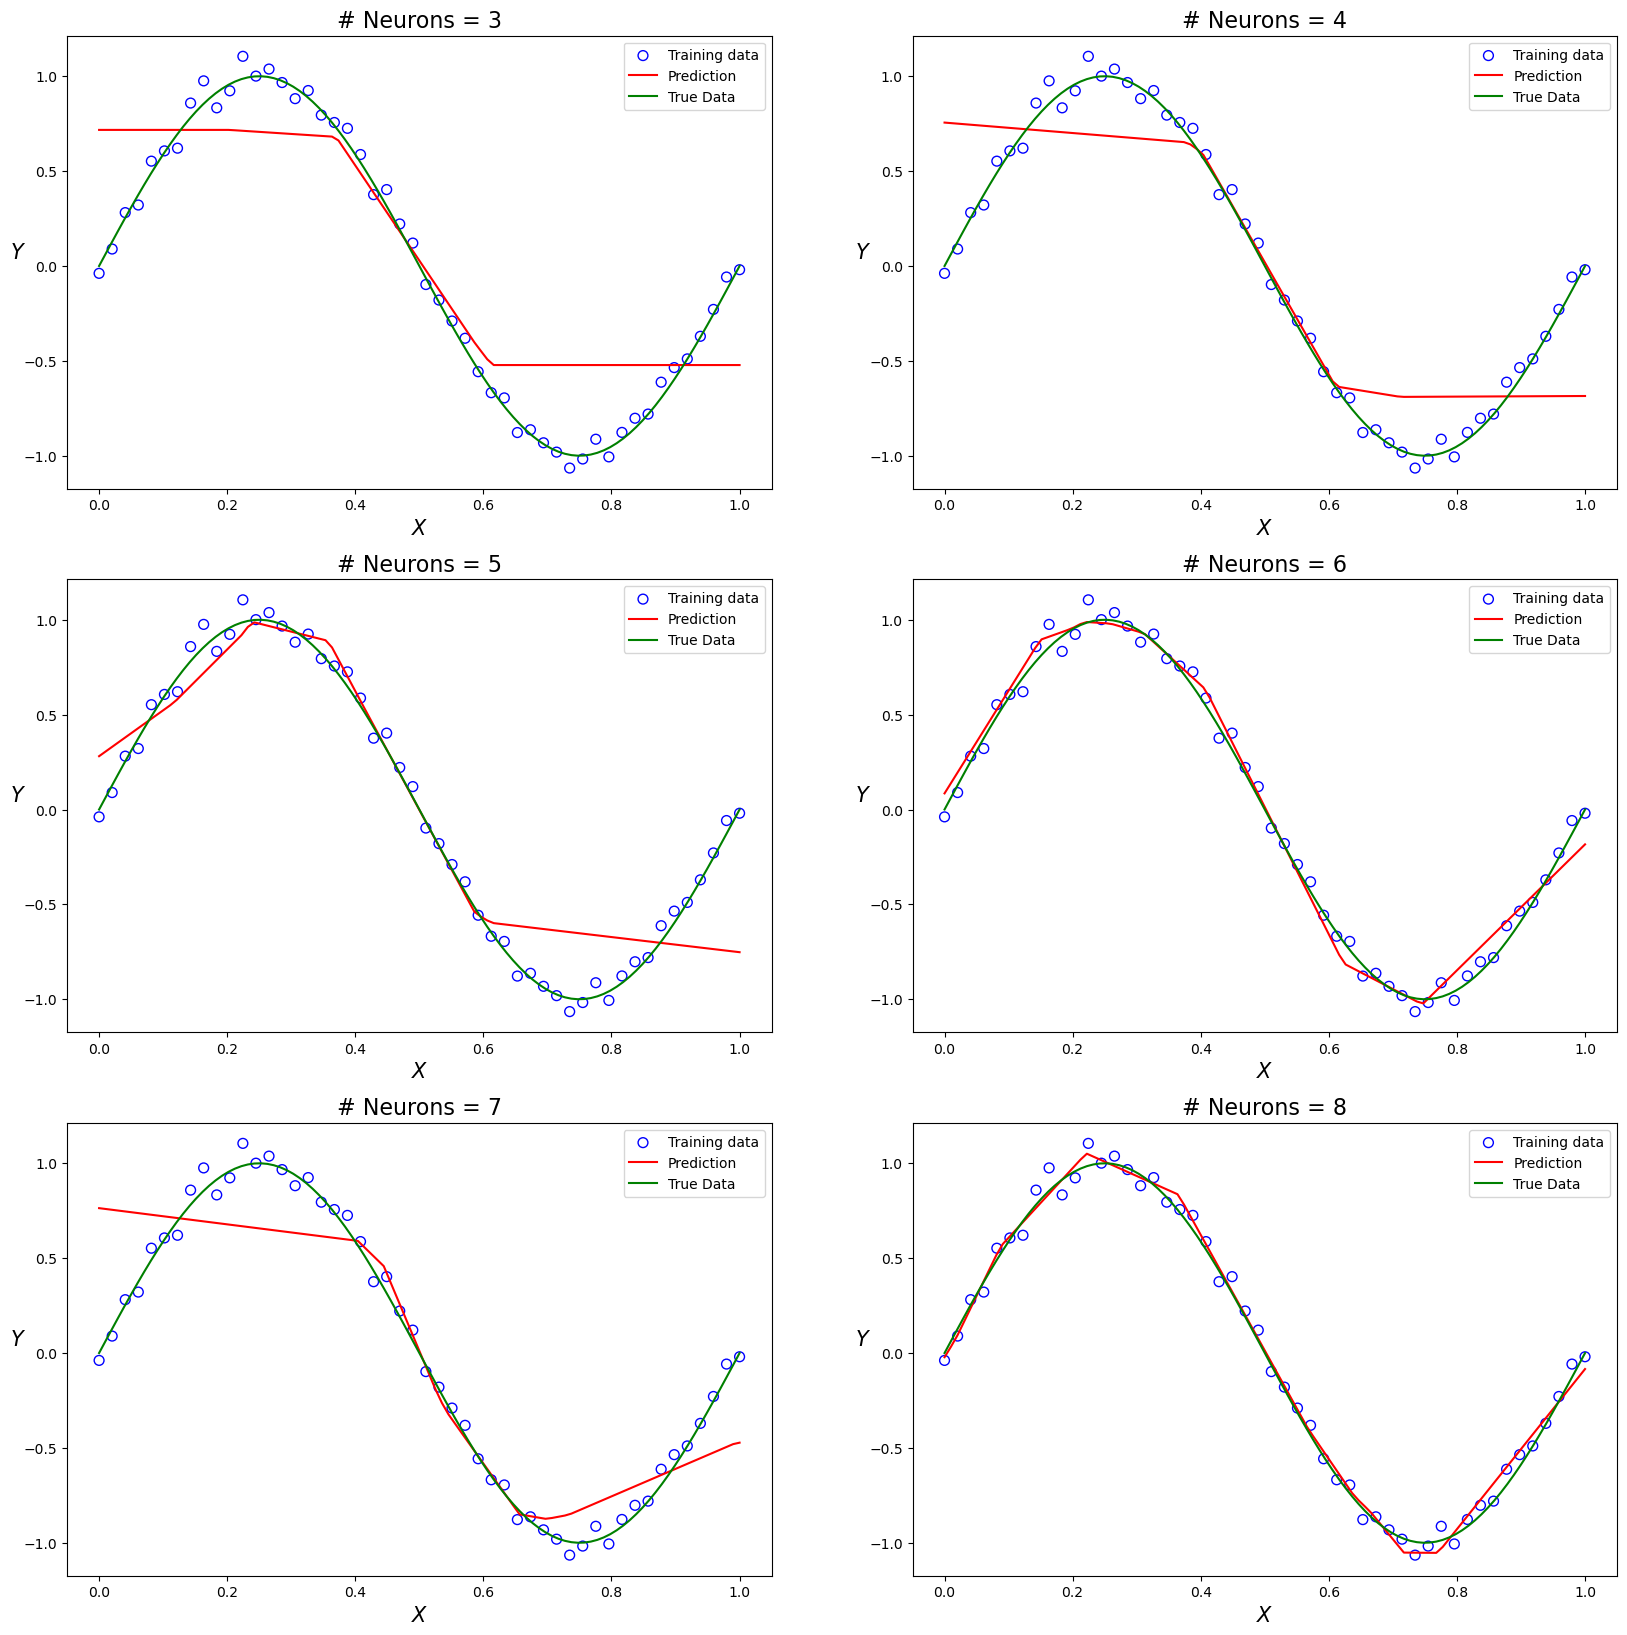

In [14]:
fig = plt.subplots(figsize=(20, 20))

for i in range(6):
    NN_R = NN(nn.ReLU, 3, i+3)                                       # initiate the model
    criterion = nn.MSELoss()                                         # MSE loss function
    optimizer = optim.Adam(NN_R.parameters(), lr=0.005)               # optimizer
    data = DataLoader(NpDataset(X_train, y_train), batch_size=10)    # training pytorch dataloader
    model_trainer_R = Trainer(NN_R, optimizer, criterion, 150)        # Define model trainer and start training 
    model_trainer_R.run(data)
    NN_R_pred = NN_R(torch.from_numpy(X_test).float()).detach().numpy().flatten()
    ax = plt.subplot(3, 2, i+1)
    plot_results(X_train, y_train, X_test, y_test, NN_R_pred, ax, true_label='True Data', 
                 pred_label='Prediction', label='Training data', title=f'# Neurons = {i+3}')

### Different number of Tanh neurons in layers

Epoch 50/50, Loss: 0.3284, lr=0.05: 100%|███████████████████████████████████████████████| 5/5 [00:00<00:00, 124.99it/s]
C:\Users\alaas\AppData\Local\Temp\ipykernel_13440\1868176028.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(3, 2, i+1)
Epoch 16/50, Loss: 0.3304, lr=0.05: 100%|████████████████████████████████████████████████| 5/5 [00:00<00:00, 94.33it/s]


Epoch 34/50, Loss: 0.1183, lr=0.05: 100%|███████████████████████████████████████████████| 5/5 [00:00<00:00, 156.23it/s]


Epoch 2/50, Loss: 0.5970, lr=0.05: 100%|████████████████████████████████████████████████| 5/5 [00:00<00:00, 192.31it/s]


Epoch 20/50, Loss: 0.3247, lr=0.05: 100%|███████████████████████████████████████████████| 5/5 [00:00<00:00, 208.31it/s]


Epoch 50/50, Loss: 0.1345, lr=0.05: 100%|███████████████████████████████████████████████| 5/5 [00:00<00:00, 192.28it/s]


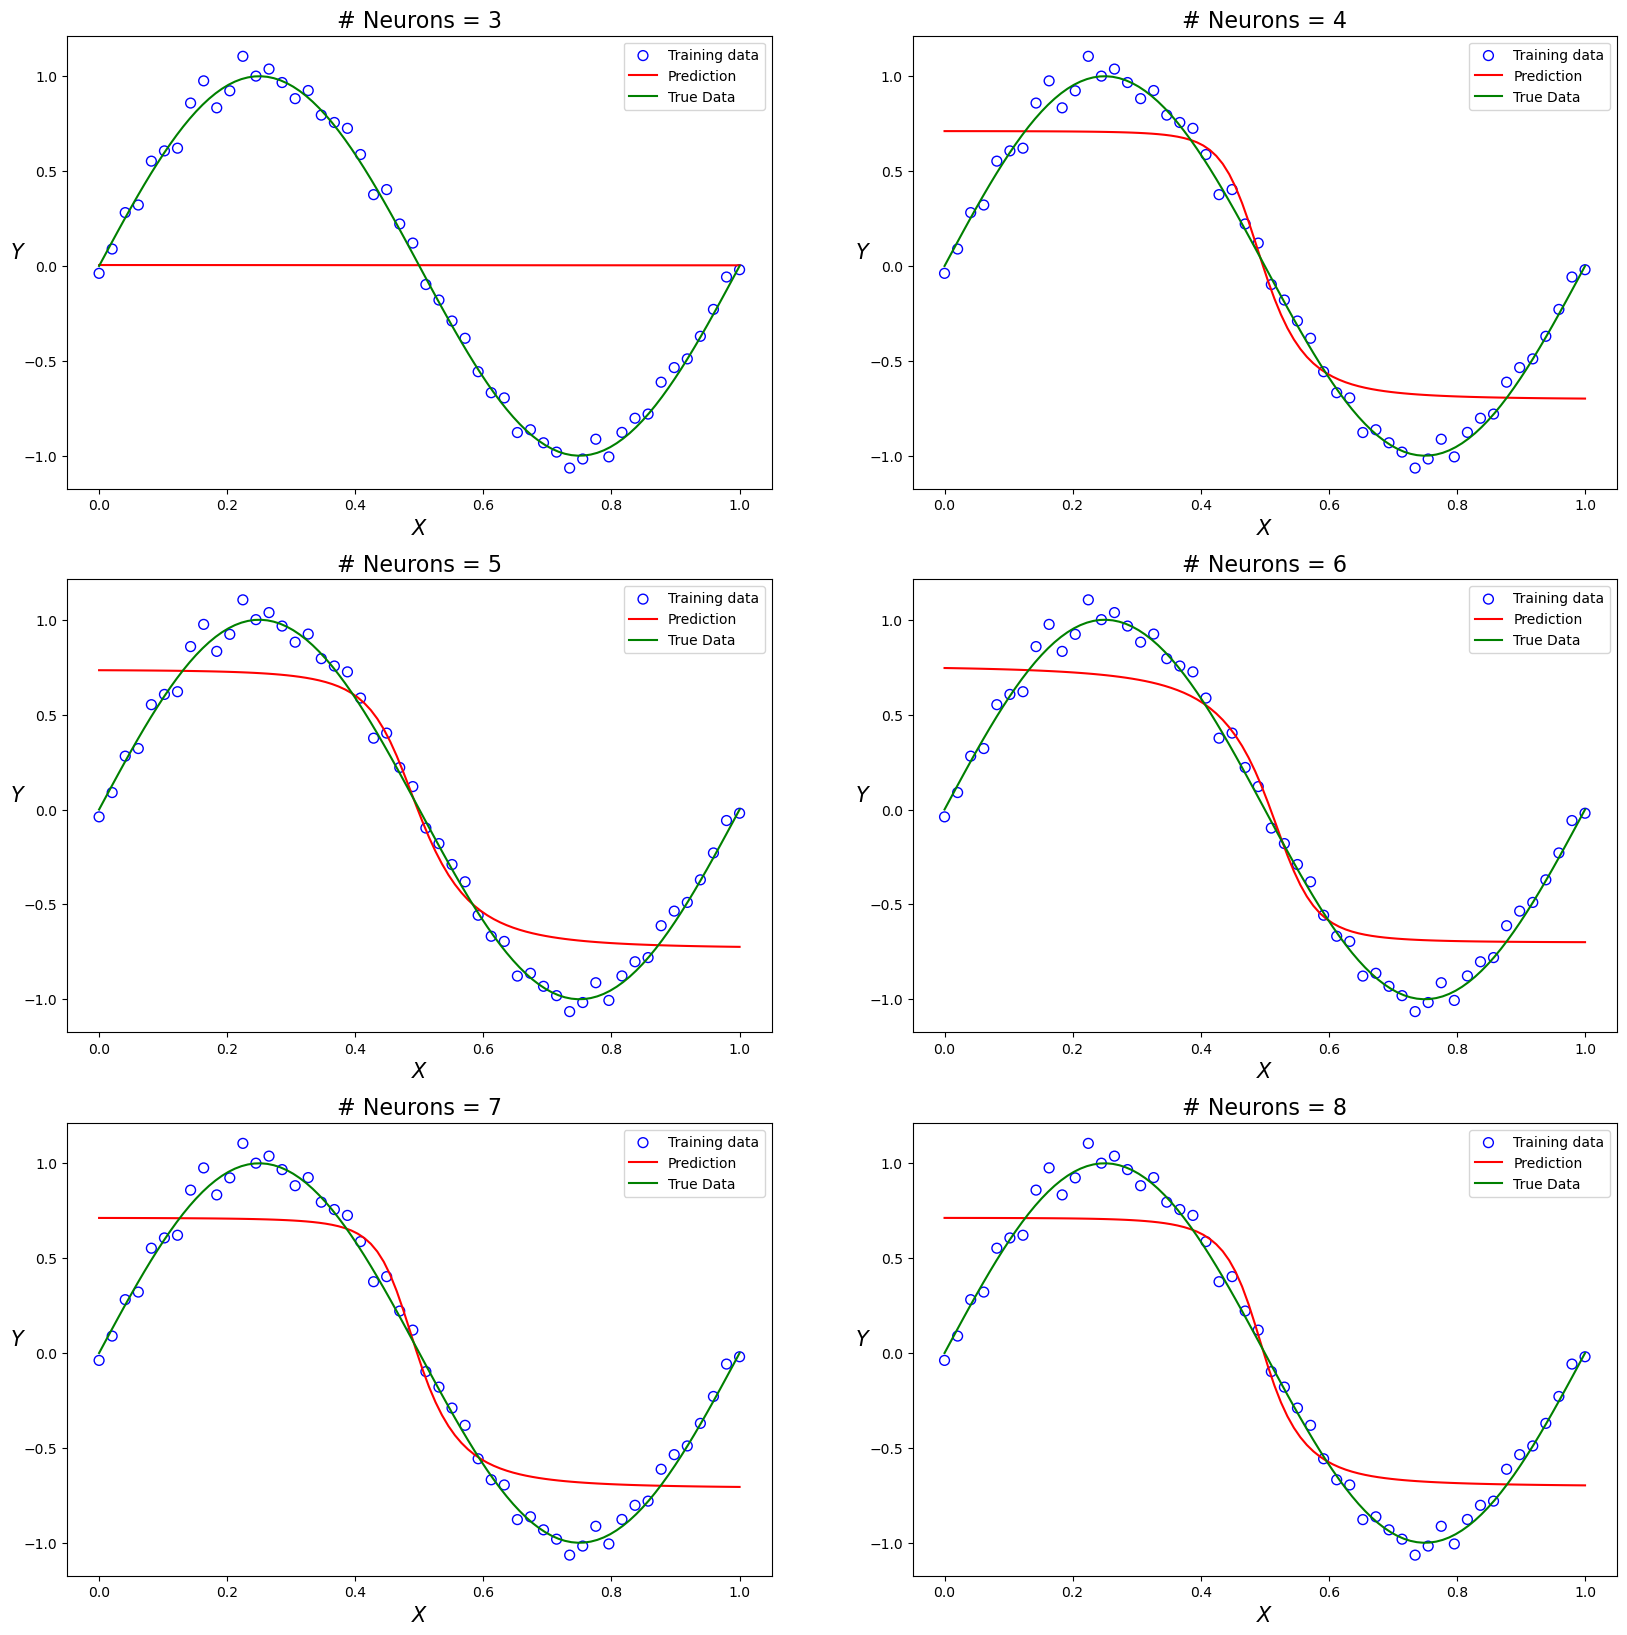

In [18]:
fig = plt.subplots(figsize=(20, 20))

for i in range(6):
    NN_R = NN(nn.Sigmoid, 3, i+3)                                       # initiate the model
    criterion = nn.MSELoss()                                         # MSE loss function
    optimizer = optim.Adam(NN_R.parameters(), lr=0.05)              # optimizer
    data = DataLoader(NpDataset(X_train, y_train), batch_size=10)    # training pytorch dataloader
    model_trainer_R = Trainer(NN_R, optimizer, criterion, 50)       # Define model trainer and start training 
    model_trainer_R.run(data)
    NN_R_pred = NN_R(torch.from_numpy(X_test).float()).detach().numpy().flatten()
    ax = plt.subplot(3, 2, i+1)
    plot_results(X_train, y_train, X_test, y_test, NN_R_pred, ax, true_label='True Data', 
                 pred_label='Prediction', label='Training data', title=f'# Neurons = {i+3}')